In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('iris.data', header = None)
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

In [75]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [39]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
# Boxplots (best for outliers)

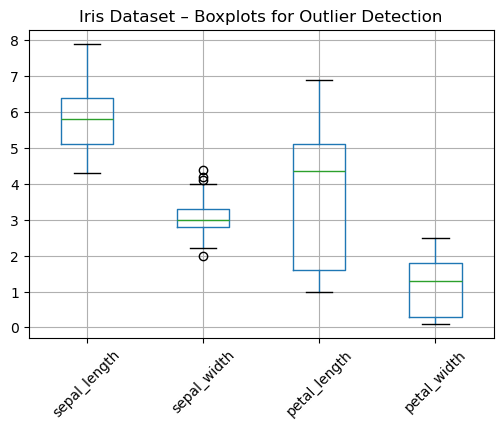

In [41]:
plt.figure(figsize=(6,4))
df.boxplot()
plt.title("Iris Dataset – Boxplots for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [61]:
float_cols = df.select_dtypes(include='float')

outliers = pd.DataFrame()

for col in float_cols.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    mask = (df[col] < lower) | (df[col] > upper)
    
    # store outliers for this column
    outliers[col] = mask
    
df[outliers.any(axis=1)]


,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


## Handling Outliers
Outliers can strongly influence statistical results and model performance, so they need to be handled appropriately. Common approaches include:
Deleting outlier rows
Replacing outlier values
Imputing values using statistical measures (mean, median)
In this project, we handle outliers by replacing them with the minimum or maximum value of their column.
This method caps extreme values at realistic boundaries without removing entire rows, preserving the structure and size of the dataset while reducing the impact of extreme observations.

In [46]:
df_clean = df.copy()

float_cols = df.select_dtypes(include='float')

for col in float_cols.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    col_min = df[col].min()
    col_max = df[col].max()
    
    # Replace lower outliers
    #df.loc[ rows , columns ]
    df_clean.loc[df_clean[col] < lower, col] = col_min
    
    # Replace upper outliers
    df_clean.loc[df_clean[col] > upper, col] = col_max


In [48]:
df_clean

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [52]:
df_clean['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Detecting Noisy Data (Outliers)

To identify noisy or abnormal values in a dataset, we use both statistical checks and visualizations.

### 1. Min() and Max()
These functions help find extreme values in each column.  
If the minimum or maximum value is extremely different from the rest of the data, it may indicate noise or outliers.

### 2. Violin Plot
A violin plot shows the distribution and density of each feature.  
Long, thin tails or strange bumps far from the center indicate potential noisy values.

### 3. Scatter Plot
Scatter plots show how two variables relate.  
Points that lie far away from the main cluster usually represent noise or outliers.  
They help visually confirm whether extreme values disrupt the expected pattern.

Using these three methods gives a clear picture of where the data behaves unusually and may require cleaning.


In [55]:
df_clean.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758667,1.198667
std,0.828066,0.442893,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


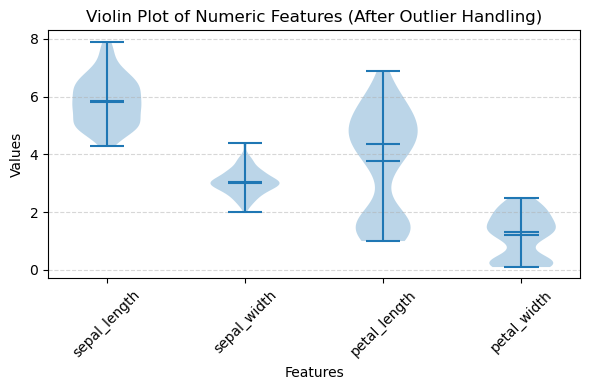

In [71]:

# Select numeric columns
num_cols = df_clean.select_dtypes(include='float').columns

# Prepare data as a list of 1D arrays (one per column)
data = [df_clean[col] for col in num_cols]

plt.figure(figsize=(6, 4))

# Draw violin plot
vp = plt.violinplot(
    data,
    showmeans=True,      # show mean line
    showmedians=True,    # show median line
    showextrema=True     # show min/max
)

# X-axis: position 1..N
plt.xticks(
    ticks=range(1, len(num_cols) + 1),
    labels=num_cols,
    rotation=45
)

plt.title("Violin Plot of Numeric Features (After Outlier Handling)")
plt.xlabel("Features")
plt.ylabel("Values")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


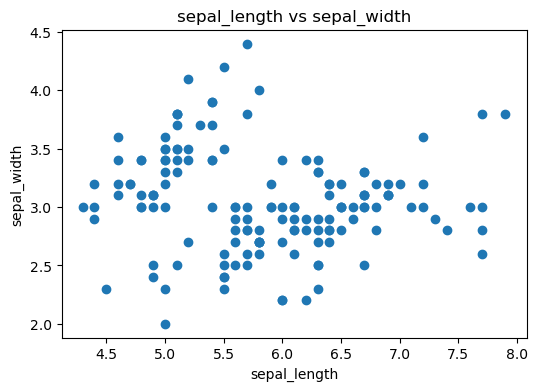

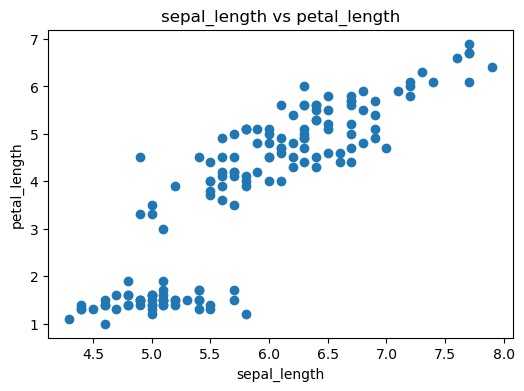

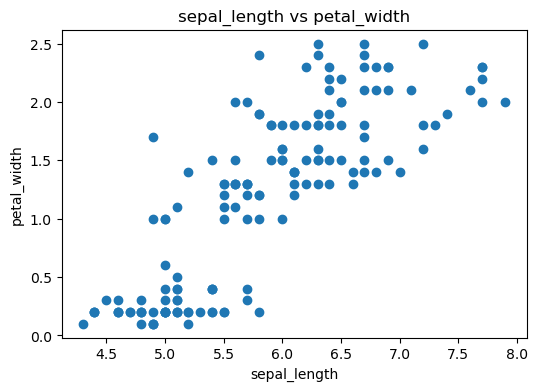

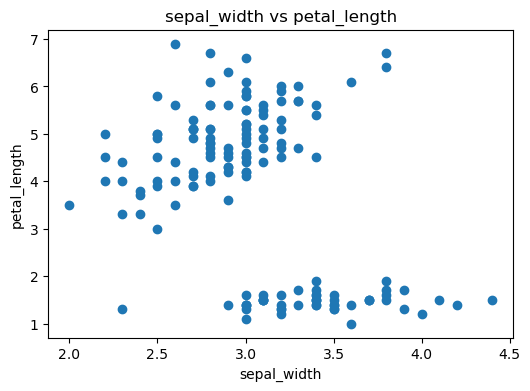

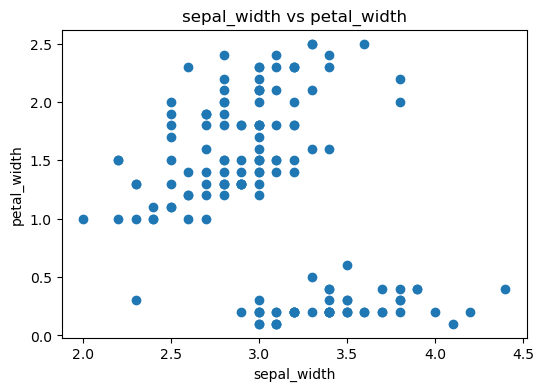

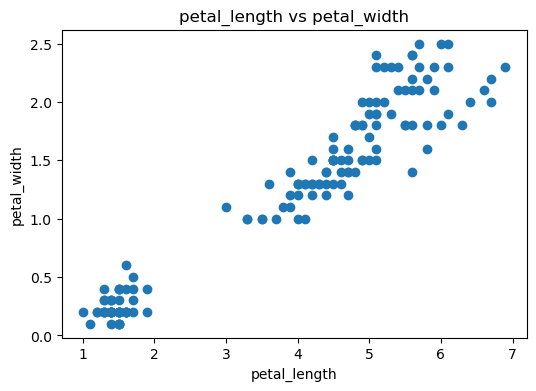

In [65]:
import itertools

cols = ["sepal_length","sepal_width","petal_length","petal_width"]

for x, y in itertools.combinations(cols, 2):
    plt.figure(figsize=(6,4))
    plt.scatter(df[x], df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x} vs {y}")
    plt.show()

In [83]:
lst = []
for i in df.select_dtypes(include = 'float').columns:
    outliers = df[((df[i] - df[i].mean())/df[i].std()).abs()>3]
    if not outliers.empty:
        lst.append({'column name': i, 
                 'outliers': outliers})
lst

[{'column name': 'sepal_width',
  'outliers':     sepal_length  sepal_width  petal_length  petal_width      species
  15           5.7          4.4           1.5          0.4  Iris-setosa}]

In [85]:
import seaborn as sns   # only used for nice heatmap


In [89]:
corr = df_clean.select_dtypes(include='float').corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.111862,0.871754,0.817954
sepal_width,-0.111862,1.000000,-0.421558,-0.359569
petal_length,0.871754,-0.421558,1.000000,0.962757
petal_width,0.817954,-0.359569,0.962757,1.000000


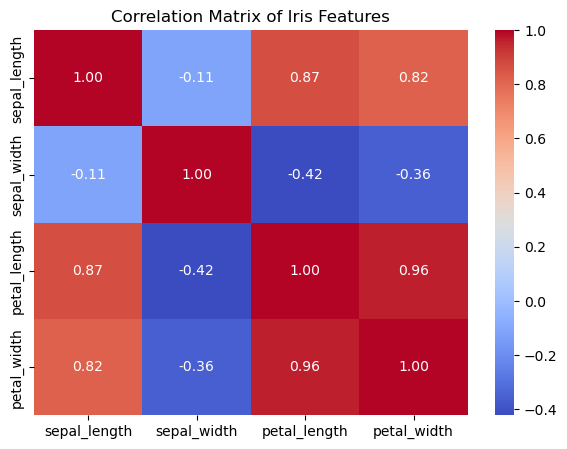

In [91]:
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Iris Features")
plt.show()

For the Iris dataset, I will keep all variables. 
Although petal_length and petal_width are highly correlated (0.96), this does not harm exploratory analysis 
or most machine-learning models. Removing a variable is only necessary for linear models or when specifically studying feature selection.


In [94]:
from sklearn.preprocessing import MinMaxScaler

df_norm = df_clean.copy()

scaler = MinMaxScaler()
num_cols = ["sepal_length","sepal_width","petal_length","petal_width"]

df_norm[num_cols] = scaler.fit_transform(df_norm[num_cols])

df_norm.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


## Data Preprocessing Summary

The preprocessing workflow for the Iris dataset includes several steps to ensure clean and consistent data for analysis and modeling:

1. **Outlier Handling**  
   Outliers were detected using both the IQR method and the Z-score method.  
   Identified outliers were handled appropriately to prevent distortion in later analysis.

2. **Missing Value Handling**  
   The dataset was checked for missing values. Since no missing entries were present, no imputation was required.

3. **Noise Detection**  
   Potential noisy values were examined using Min/Max checks, violin plots, and scatter plots.  
   This helped verify the consistency of the data distribution.

4. **Correlation Analysis**  
   A correlation matrix was generated to understand relationships between numerical features.  
   Strong correlations were observed between petal_length and petal_width.

5. **Normalization**  
   The numerical features were normalized to ensure all variables are on a similar scale, improving model performance and stability.

6. **Encoding**  
   The dataset contains only numerical features; therefore, no feature encoding was required.  
   However, for machine-learning modeling, the target variable (`species`) must be **label-encoded** because most ML algorithms cannot process categorical labels directly.

This preprocessing ensures that the dataset is clean, consistent, and ready for model training.
